<a href="https://colab.research.google.com/github/guinetik/python-ds/blob/master/Colab_Sentiment_and_Persona_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# spacy modulos em portugues
!python -m spacy download pt_core_news_sm
## deplacy
!pip install deplacy stanza
# imports
import string
import pandas as pd
import csv
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import stanza
import deplacy
import graphviz
import matplotlib.pyplot as plt
# Baixar os recursos do NLTK
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')
# Carregar o modelo do Spacy em português
nlp = spacy.load("pt_core_news_sm")
##
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

2023-09-13 07:51:10.433339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 07:51:11.475717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 12.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# File URLs

In [2]:
url_nodes = "https://drive.google.com/uc?id=1C04iiMkjoWStAbL19RcIAAE2uOnITejr&export=download"
url_edges = "https://drive.google.com/uc?id=1qgDnfspXejVCuRaqUUFLIxYsMsbvZBaH&export=download"
url_selected_events = "https://drive.google.com/uc?id=1LE6KriDSpUZaeDLA3S00PrvRlqcK8po5&export=download"
url_events = "https://drive.google.com/uc?id=1ve5bdHhtE0Kl4Pci8A6l6XIikkbl1Bwm&export=download"

# Load Nodes File

In [3]:
nodes = pd.read_csv(url_nodes, sep=',', decimal='.', header=0)
nodes

,colab_user_id,birth_date,city,education,gender,idade,race
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white
1,222051,1961-02-12,Santo André,primary,male,62.0,NaN
2,440321,1995-12-16,Niterói,secondary,female,28.0,brown
3,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white
4,427856,1960-05-04,Niterói,bachelor,male,63.0,white
...,...,...,...,...,...,...,...
57796,702775,1980-07-16,São Gonçalo,NaN,male,43.0,NaN
57797,362855,1983-01-07,Santo André,NaN,male,40.0,NaN
57798,947835,NaN,Serra,NaN,male,NaN,NaN
57799,694585,1974-10-20,São Gonçalo,secondary,male,49.0,brown


# Load Edges File

In [4]:
edges = pd.read_csv(url_edges, sep=',', decimal='.', header=0)
edges

,source,target,created_at
0,2,2767,2014-08-13T00:00:00-0300
1,20666,64273,2015-02-05T00:00:00-0200
2,20666,43600,2015-02-05T00:00:00-0200
3,65771,22120,2015-02-05T00:00:00-0200
4,65771,11488,2015-02-05T00:00:00-0200
...,...,...,...
40214,215293,249557,2019-09-18T00:00:00-0300
40215,221535,237294,2019-09-18T00:00:00-0300
40216,246568,250436,2019-09-19T00:00:00-0300
40217,258633,188780,2019-11-09T00:00:00-0300


# Load Selected Events

In [5]:
selected_events = pd.read_csv(url_selected_events, sep=',', decimal='.', header=0)
selected_events

,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,city,lat,lon,deleted_at,city_id
0,398893,689995,cratera se formando junto ao meio fio da calça...,ATENDIMENTO,2022-08-22T12:32:45-0300,9761,Buraco nas vias,Maceió,-9.674018,-35.761009,NaN,69
1,445735,505906,poste com lâmpada queimada a varios meses.\n\n...,RECUSADO,2023-02-24T21:13:04-0300,11421,Lâmpada apagada à noite,São Gonçalo,-22.850234,-43.068530,NaN,3663
2,442170,431354,"Poste sem iluminação pública, desde a semana d...",FECHADO,2023-02-15T21:59:35-0300,1689,Lâmpada apagada à noite,Niterói,-22.892010,-43.091803,NaN,3638
3,420493,690592,venho por meio desta solicitação um pedido de...,FECHADO,2022-12-01T00:16:37-0300,9955,Descarte irregular de lixo,Mesquita,-22.797534,-43.441498,NaN,3633
4,406621,717058,Solicito me humilhando mais uma vez que troque...,FECHADO,2022-09-27T21:37:47-0300,11421,Lâmpada apagada à noite,São Gonçalo,-22.840175,-43.065324,NaN,3663
...,...,...,...,...,...,...,...,...,...,...,...,...
32916,318142,133757,Lampada apagada a noite,FECHADO,2021-10-06T21:06:33-0300,5645,Lâmpada apagada à noite,Novo Hamburgo,-29.722039,-51.143741,NaN,4204
32917,334283,91232,Todos os dias há o mesmo problema. Motoristas ...,FECHADO,2021-12-15T01:28:35-0300,5585,Ponto de infração de trânsito recorrente,Novo Hamburgo,-29.718532,-51.128758,NaN,4204
32918,435094,723243,"Um poste com ""4 pétalas"" lâmpadas LEDs em curt...",FECHADO,2023-01-29T07:46:32-0300,11680,Lâmpada apagada à noite,Diadema,-23.679597,-46.596144,NaN,4934
32919,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,FECHADO,2023-03-14T19:42:10-0300,1687,Fiação irregular,Niterói,-22.898819,-43.094667,NaN,3638


# Load All Events

In [6]:
events = pd.read_csv(url_events, sep=',', decimal='.', header=0)
events = events.rename(columns={'id': 'event_id', 'user_id': 'colab_user_id', 'lng': 'lon'})
events

,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,lat,lon
0,5,623,Carro estacionado na calçada em Edelson Cabele...,RECUSADO,2013-03-06 18:59,7575,Ponto de infração de trânsito recorrente,-8.046207,-34.895451
1,8,68,Estacionamento da própria Prefeitura próximo a...,RECUSADO,2013-03-07 19:03,7575,Ponto de infração de trânsito recorrente,-8.126271,-34.903793
2,9,166,"Na esquina com a rua da Aurora, calçada da Com...",RECUSADO,2013-03-07 21:56,7546,Calçada irregular,-8.047074,-34.877379
3,10,164,Todos os dias a concessionária Auto Mar estaci...,RECUSADO,2013-03-08 00:51,7575,Ponto de infração de trânsito recorrente,-8.097561,-34.885641
4,11,733,"Diariamente, até mesmo em frente a prédio da p...",RECUSADO,2013-03-08 02:10,7575,Ponto de infração de trânsito recorrente,-8.043143,-34.891382
...,...,...,...,...,...,...,...,...,...
329689,377001,179101,"Esgoto escorrendo da caixa pluvial, situação c...",ABERTO,2022-05-23 17:54,1742,Vazamento de esgoto,-22.930053,-43.022251
329690,377002,664235,"Olá, prezados, solicito por favor a fixação de...",NOVO,2022-05-23 18:02,11064,Manutenção Predial Geral,-20.501867,-54.613311
329691,377003,681506,Limpeza em toda extensão da Rua José Bonifáci...,NOVO,2022-05-23 18:05,9955,Descarte irregular de lixo,-22.783890,-43.410561
329692,377004,404396,árvores na rua caindo sobre as casas Ponto ...,NOVO,2022-05-23 18:05,1699,Poda de árvore,-22.891748,-43.066333


# Filter nodes by City
Mesquita, Santo André, Niterói

In [8]:
filtered_nodes = nodes[nodes['city'].isin(['Niterói', 'Santo André', 'Mesquita'])]
filtered_nodes

,colab_user_id,birth_date,city,education,gender,idade,race
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white
1,222051,1961-02-12,Santo André,primary,male,62.0,NaN
2,440321,1995-12-16,Niterói,secondary,female,28.0,brown
3,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white
4,427856,1960-05-04,Niterói,bachelor,male,63.0,white
...,...,...,...,...,...,...,...
57790,724545,1959-06-02,Santo André,NaN,NaN,64.0,NaN
57791,500204,1983-09-17,Santo André,NaN,female,40.0,NaN
57794,914566,NaN,Santo André,NaN,male,NaN,NaN
57797,362855,1983-01-07,Santo André,NaN,male,40.0,NaN


# Collate unique user ids

In [9]:
unique_colab_user_ids = filtered_nodes['colab_user_id'].unique()
print(unique_colab_user_ids)

[323968 222051 440321 ... 914566 362855 918164]


# Filter events by unique user ids

In [10]:
filtered_events = events[events['colab_user_id'].isin(unique_colab_user_ids)]
# Filter the events_selected_users DataFrame
filtered_events_selected_users = selected_events[selected_events['colab_user_id'].isin(unique_colab_user_ids)]

# Merge the filtered results of events and events_selected_users DataFrames
merged_events = pd.concat([filtered_events, filtered_events_selected_users], ignore_index=True)

merged_events

,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,lat,lon,city,deleted_at,city_id
0,41,86,Árvore bloqueando a calçada,FECHADO,2013-03-17 16:55,7574,Poda de árvore,-8.037968,-34.876409,NaN,NaN,NaN
1,54,2,Barraca no meio da calçada na Marquês de Olind...,RECUSADO,2013-03-21 14:11,7558,Ocupação irregular de área pública,-8.063467,-34.872855,NaN,NaN,NaN
2,58,86,Utilização da calçada para estacionamento. Pad...,RECUSADO,2013-03-23 18:59,7558,Ocupação irregular de área pública,-8.105268,-34.887529,NaN,NaN,NaN
3,216,2654,"Enquanto o sertão sofre com a falta d'água, em...",RECUSADO,2013-04-05 21:01,7590,Bueiro entupido,-8.034912,-34.919247,NaN,NaN,NaN
4,582,86,"Árvore batendo na fiação, que já está toda bag...",FECHADO,2013-04-22 19:13,3942,Poda de árvore,-23.601828,-46.658975,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
188597,334387,638285,"Pessoal, não existe categoria específica pro m...",NOVO,2021-12-15T14:39:09-0300,16,Maus tratos a animais,-23.671686,-46.534819,Santo André,2021-12-15T14:46:33-0300,5317.0
188598,334407,567408,"gostaria solicitação de uma tampa , desse bura...",RECUSADO,2021-12-15T16:14:24-0300,64,Equipamento público danificado,-22.778237,-43.401197,Mesquita,2021-12-15T18:33:24-0300,3633.0
188599,334593,649971,Tem uma vaca morta atrás da minha casa. solici...,ABERTO,2021-12-15T23:51:27-0300,10,Descarte irregular de lixo,-22.879156,-43.031812,Niterói,2021-12-17T02:10:26-0300,3638.0
188600,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,FECHADO,2023-03-14T19:42:10-0300,1687,Fiação irregular,-22.898819,-43.094667,Niterói,NaN,3638.0


In [11]:
#merged_events.to_csv('merged_events.csv', encoding='utf-8-sig', index=False)

# Sentiment Analysis Code

In [12]:
# Inicializar os stemmers e lemmatizers
stemmer = RSLPStemmer()
lemmatizer = WordNetLemmatizer()

# Função para exibir o mapa sintático da frase utilizando Stanza e Deplacy
def exibirMapaSintatico(frase):
  nlp_stanza = stanza.Pipeline("pt")
  doc = nlp_stanza(frase)
  deplacy.render(doc)
  graphviz.Source(deplacy.dot(doc))

# Função para exibir a distribuição de palavras e nuvem de palavras
def visualizarDistribuicaoPalavras(collection, top):
  cv = CountVectorizer(stop_words=stopwords.words('portuguese'))
  words = cv.fit_transform(collection)
  sum_words = words.sum(axis=0)

  words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

  frequency.head(top).plot(x='word', y='freq', kind='bar', figsize=(20, 7), color='blue')
  wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(words_freq))
  plt.figure(figsize=(20, 8))
  plt.imshow(wordcloud)
  plt.title("WordCloud", fontsize=22)
  plt.show()

# Carregar o arquivo CSV com o dicionário Oplexicon
dict_oplexicon = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=1iUCi4LRaOnHpcthw86KpuYqNzFKlcpZn&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[2]
  dict_oplexicon[palavra] = polaridade

# Carregar o arquivo CSV com o dicionário Unilex
dict_unilex = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=1AViTEwjiwCwh2yoiCeNd-hjx2ysN5xxO&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_unilex[palavra] = polaridade

# Carregar o arquivo CSV com o dicionário WordNetAffectBr
dict_wordnetaffectbr = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=18q63AB7uSVIyRMENi4Dgx9Kchn-yv_pe&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_wordnetaffectbr[palavra] = polaridade

# Função de pré-processamento do texto
def preprocessamento(texto):
  texto = str(texto).lower()
  documento = nlp(texto)
  lista = []

  for token in documento:
    lista.append(lemmatizer.lemmatize(token.text))

  lista = [palavra for palavra in lista if palavra not in stopwords.words('portuguese') and palavra not in string.punctuation and not palavra.isdigit()]
  return lista

# Função para obter a polaridade da frase usando um dicionário
def obterPolaridade(frase, dicionario):
  print("obterPolaridade: ", frase)
  frase_processada = preprocessamento(frase)
  print("frase_processada: ", frase_processada)
  frase_polaridade = [float(dicionario.get(palavra, 0)) for palavra in frase_processada]
  print("frase_polaridade: ", frase_polaridade)
  score = sum(frase_polaridade)
  print("score: ", score)
  return score

# Função para analisar o sentimento da frase usando diferentes dicionários
def analisarSentimento(frase, dicionarios):
  scores = [obterPolaridade(frase, dicionario) for dicionario in dicionarios]
  return scores

# Função para imprimir os valores associados a cada palavra da frase
def printLexiconPhrase(frase):
  phrases = {}
  for palavra in frase.lower().translate(str.maketrans('', '', string.punctuation)).split(" "):
    phrases[palavra.strip()] = lexicon.get(palavra.strip(), None)
  for palavra, valor in phrases.items():
    print(palavra, ": ", valor)
# Função para criar o conjunto de dados a partir dos eventos do Colab
def criarDataset(colab_events):
  dataset = colab_events.drop(columns=['status', 'created_at', 'event_type_name'])
  return dataset

# Ajustando o motor de sentimento

# Adicionar palavras extras e corrigir valores de palavras no dicionário lexicon
lexicon = dict_oplexicon.copy()
lexicon.update(dict_unilex)
lexicon.update(dict_wordnetaffectbr)

palavras_lexicon = {
    "colabora": 1,
    "rua": 1,
    "iptu": -1,
    "prefeito": -1,
    "prefeitos": -1,
    "irregulares": -1,
    "indesejadas": -1,
    "bastasse": -1,
    "pública": 1,
    "horrorosas": -1,
    "indigência": -1,
    "inadequados": -1,
    "pt": -1,
    "psdb": -1,
    "pdt": -1,
    "corrupção": -1,
    "varias": -1,
    "árvore": 1,
    "urgente": 1,
    "número": 1,
    "frente": 1,
    "façam": -1,
    "asfaltem": -1,
    "prefeitura": 0.5,
    "sofreu": -1,
    "extremamente": -1,
    "mal": -1,
    "dejetos": -1,
    "vistoria": -1,
    "responsabilidade": -1,
    "secretaria": -1,
    "providência": -1,
    "gargalhadas": -1,
    "barulho": -1,
    "botequim": -1,
    "colab": -1,
    "algazarra": -1,
    "descaso": -1,
    "deveria": -1,
    "providências": -1,
    "reclamação": -1,
    "irrespirável": -1,
    "recorrentes": -1,
    "irregularidade": -1,
    "irregularidades": -1,
    "trabalhando": 1,
    "trabalhado": 1,
    "transparente": 1,
    "resolver": 0.5,
    "problemas": 0.5,
    "obstáculos": -1,
    "abismo": -1,
    "descumprimento": -1,
    "solicito": 1,
    "limpeza": 1
}

In [13]:
for palavra, valor in palavras_lexicon.items():
  lexicon[palavra] = valor

# Testando a polaridade das frases de exemplo
frases_teste = [
    "Isso é culpa dos prefeitos que não ligam para a população",
    "Eu pago meu IPTU em dia é um absurdo isso acontecer",
    "Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade",
    "Fiação sem vergonha na Vila Olímpia. Fios caem até o chão, pondo em perigo a segurança do pedestre.",
    "Calçadão de Boa Viagem com várias depressões e buracos causados por infiltração de água",
    "O descumprimento da política nacional de mobilidade é evidente nessa intervenção feita na ponte Paulo Guerra. Não basta o resto da calçada da ponte estar esburacada e cheia de obstáculos, é preciso também abrir um abismo para o pedestre ter que ultrapassar. Essa alça construída para dar acesso ao Shopping Riomar é imoral e com certeza haverá atropelamentos, que chamarão de 'acidentes'. Não será acidente, será apenas o fruto de uma infraestrutura toda voltada para o fluxo de automóveis individuais em detrimento do pedestre em descumprimento a lei federal. Infelizmente o Ministério Público não intervém nesse caso. Ainda estamos muito longe de atingir a acessibilidade universal."
]

for frase in frases_teste:
  print("Polaridade da frase '", frase, "':", obterPolaridade(frase, lexicon))
  print("BREAKDOWN LEXICON")
  printLexiconPhrase(frase)
  print()

obterPolaridade:  Isso é culpa dos prefeitos que não ligam para a população
frase_processada:  ['culpa', 'prefeitos', 'ligam', 'população']
frase_polaridade:  [-1.0, -1.0, 0.0, 0.0]
score:  -2.0
Polaridade da frase ' Isso é culpa dos prefeitos que não ligam para a população ': -2.0
BREAKDOWN LEXICON
isso :  None
é :  None
culpa :  -1
dos :  None
prefeitos :  -1
que :  None
não :  None
ligam :  None
para :  None
a :  None
população :  None

obterPolaridade:  Eu pago meu IPTU em dia é um absurdo isso acontecer
frase_processada:  ['pago', 'iptu', 'dia', 'absurdo', 'acontecer']
frase_polaridade:  [-1.0, -1.0, 29.0, -4.0, -1.0]
score:  22.0
Polaridade da frase ' Eu pago meu IPTU em dia é um absurdo isso acontecer ': 22.0
BREAKDOWN LEXICON
eu :  None
pago :  -1
meu :  None
iptu :  -1
em :  None
dia :  29
é :  None
um :  None
absurdo :  -4
isso :  None
acontecer :  -1

obterPolaridade:  Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade
fra

# Run sentiment analysis on User's posts

In [14]:
dataset = criarDataset(merged_events)

# Calcular os scores das postagens usando o lexicon
scores = []
for index, row in dataset.iterrows():
  post = row[2]
  score = obterPolaridade(post, lexicon)
  scores.append(score)

dataset["score"] = scores

Streaming output truncated to the last 5000 lines.
frase_processada:  ['árvore', 'alto', 'risco', 'queda', 'toda', 'tomada', 'cupim.destruindo', 'calçadas', 'dificultando', 'iluminação', 'pública', 'árvore', 'galhos', 'envolvendo', 'sobre', 'rede', 'eletrica', '\n\n', 'ponto', 'referência', 'rua', 'hospital', 'santa', 'marta']
frase_polaridade:  [1.0, 0.0, 0.0, 1.0, 0.0, -4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 1.0]
score:  5.0
obterPolaridade:  essa rua nao tem nenhuma condição de ser mao dupla! prefeitura de niteroi sempre atrapalhando a vida do cidadão
simplesmente tiraram todas ad vagas da rua pra virar uma rua de mao dupla, fora os acidentrs que irao ocorrer, pois a via trasnversal da em frente ao retorno! 
absurdo, 0 planejamemto 

frase_processada:  ['rua', 'nao', 'nenhuma', 'condição', 'mao', 'dupla', 'prefeitura', 'niteroi', 'sempre', 'atrapalhando', 'vida', 'cidadão', '\n', 'simplesmente', 'tiraram', 'toda', 'ad', 'vagas', 'r

In [15]:
dataset

,event_id,colab_user_id,description,event_type_id,lat,lon,city,deleted_at,city_id,score
0,41,86,Árvore bloqueando a calçada,7574,-8.037968,-34.876409,NaN,NaN,NaN,1.0
1,54,2,Barraca no meio da calçada na Marquês de Olind...,7558,-8.063467,-34.872855,NaN,NaN,NaN,9.0
2,58,86,Utilização da calçada para estacionamento. Pad...,7558,-8.105268,-34.887529,NaN,NaN,NaN,9.0
3,216,2654,"Enquanto o sertão sofre com a falta d'água, em...",7590,-8.034912,-34.919247,NaN,NaN,NaN,-18.0
4,582,86,"Árvore batendo na fiação, que já está toda bag...",3942,-23.601828,-46.658975,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
188597,334387,638285,"Pessoal, não existe categoria específica pro m...",16,-23.671686,-46.534819,Santo André,2021-12-15T14:46:33-0300,5317.0,14.5
188598,334407,567408,"gostaria solicitação de uma tampa , desse bura...",64,-22.778237,-43.401197,Mesquita,2021-12-15T18:33:24-0300,3633.0,-3.5
188599,334593,649971,Tem uma vaca morta atrás da minha casa. solici...,10,-22.879156,-43.031812,Niterói,2021-12-17T02:10:26-0300,3638.0,-7.0
188600,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,1687,-22.898819,-43.094667,Niterói,NaN,3638.0,-1.0


In [16]:
# Define a custom normalization function
# Separate positive and negative scores
positive_scores = dataset[dataset['score'] > 0]['score']
negative_scores = dataset[dataset['score'] < 0]['score']

# Define a custom normalization function for positive scores
def normalize_positive(score):
    return 0.1 + (score / positive_scores.max()) * 0.9

# Define a custom normalization function for negative scores
def normalize_negative(score):
    return -0.9 + (score / negative_scores.min()) * 0.1

# Apply the custom normalization functions to their respective subsets
dataset.loc[dataset['score'] > 0, 'normalized_score'] = positive_scores.apply(normalize_positive)
dataset.loc[dataset['score'] < 0, 'normalized_score'] = negative_scores.apply(normalize_negative)
dataset.loc[dataset['score'] == 0, 'normalized_score'] = 0  # Neutral score remains as 0


# Print the result
dataset

,event_id,colab_user_id,description,event_type_id,lat,lon,city,deleted_at,city_id,score,normalized_score
0,41,86,Árvore bloqueando a calçada,7574,-8.037968,-34.876409,NaN,NaN,NaN,1.0,0.101865
1,54,2,Barraca no meio da calçada na Marquês de Olind...,7558,-8.063467,-34.872855,NaN,NaN,NaN,9.0,0.116788
2,58,86,Utilização da calçada para estacionamento. Pad...,7558,-8.105268,-34.887529,NaN,NaN,NaN,9.0,0.116788
3,216,2654,"Enquanto o sertão sofre com a falta d'água, em...",7590,-8.034912,-34.919247,NaN,NaN,NaN,-18.0,-0.890217
4,582,86,"Árvore batendo na fiação, que já está toda bag...",3942,-23.601828,-46.658975,NaN,NaN,NaN,1.0,0.101865
...,...,...,...,...,...,...,...,...,...,...,...
188597,334387,638285,"Pessoal, não existe categoria específica pro m...",16,-23.671686,-46.534819,Santo André,2021-12-15T14:46:33-0300,5317.0,14.5,0.127047
188598,334407,567408,"gostaria solicitação de uma tampa , desse bura...",64,-22.778237,-43.401197,Mesquita,2021-12-15T18:33:24-0300,3633.0,-3.5,-0.898098
188599,334593,649971,Tem uma vaca morta atrás da minha casa. solici...,10,-22.879156,-43.031812,Niterói,2021-12-17T02:10:26-0300,3638.0,-7.0,-0.896196
188600,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,1687,-22.898819,-43.094667,Niterói,NaN,3638.0,-1.0,-0.899457


# Filter Best and worse scores

In [17]:
# Filtrar os piores e melhores scores
worst_scores = dataset.sort_values(by='score', ascending=True).head(1000)
best_scores = dataset.sort_values(by='score', ascending=False).head(1000)

In [18]:
best_scores = best_scores.sort_values(by='score', ascending=False)
best_scores

,event_id,colab_user_id,description,event_type_id,lat,lon,city,deleted_at,city_id,score,normalized_score
147193,336896,236585,"boa tarde! venho solicitar a prefeitura, que a...",1678,-22.907433,-43.071291,NaN,NaN,NaN,482.5,1.000000
153472,345606,328388,Realizei um teste de covid-19 no dia 10/01na c...,9980,-22.782851,-43.431598,NaN,NaN,NaN,400.0,0.846114
154754,347360,236585,bom dia prefeitura! é desgastante conviver dia...,1678,-22.907503,-43.071225,NaN,NaN,NaN,358.0,0.767772
149953,340776,328388,Realizei um teste de covid-19 no dia 10/01 e f...,393,-22.774391,-43.431987,NaN,NaN,NaN,337.0,0.728601
8584,66958,135918,"Prezados senhores,\r\n \r\n solicito, encareci...",1689,-22.954946,-43.079292,NaN,NaN,NaN,288.0,0.637202
...,...,...,...,...,...,...,...,...,...,...,...
80606,243302,184322,bom dia! cavalo morto na via a uns três dias,9938,-22.780304,-43.425411,NaN,NaN,NaN,78.0,0.245492
131214,312877,161310,Olá bom dia precisamos de serviço de varrição ...,1750,-22.878124,-43.090617,NaN,NaN,NaN,78.0,0.245492
150059,340908,256520,"Como mostro nessa foto ,é isso que está aconte...",3358,-23.634500,-46.519329,NaN,NaN,NaN,77.5,0.244560
3058,25897,88621,Essa foto foi tirada hoje e mostra um possível...,1707,-22.957514,-43.029951,NaN,NaN,NaN,77.5,0.244560


In [126]:
filtered_rows = dataset[dataset['colab_user_id'] == 344258]
filtered_rows

,event_id,colab_user_id,description,event_type_id,lat,lng,lon,score,normalized_score
54642,259065,344258,está interferindo na rede elétrica onde com o ...,3361,-23.681495,-46.531420,NaN,10.0,0.122500
54643,259066,344258,a árvore está muito grande interferindo na red...,3361,-23.681495,-46.531420,NaN,14.0,0.131500
68629,283580,344258,boa tarde já pedi a poda desta árvore em janei...,3361,-23.681602,-46.531396,NaN,39.5,0.188875
78519,301616,344258,estou solicitando a poda desta árvore dês do d...,3361,-23.681553,-46.531474,NaN,280.0,0.730000
100689,349312,344258,todos os dias fecham a rua de carros dos dois ...,3323,-23.663656,-46.524132,NaN,33.0,0.174250
102015,351991,344258,ponto de carga e descarga irregular onde nós p...,3346,-23.663789,-46.524175,NaN,-9.5,-0.894837


# Word Cloud

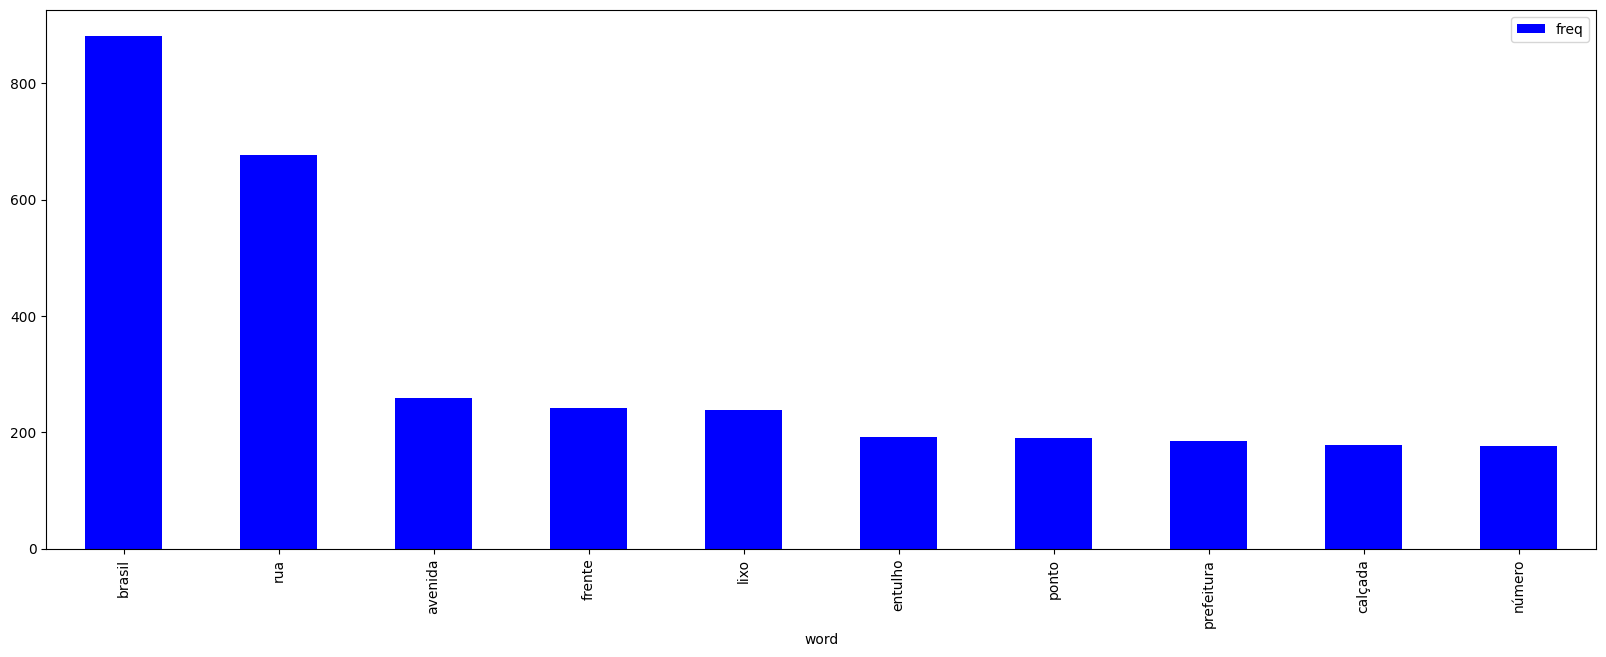

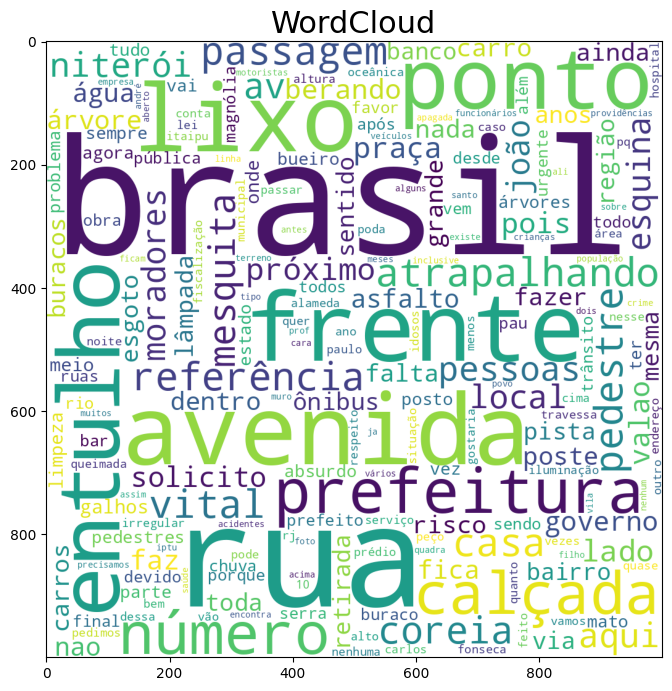

In [19]:
# Visualizar a distribuição de palavras nos piores scores
visualizarDistribuicaoPalavras(worst_scores['description'], 10)

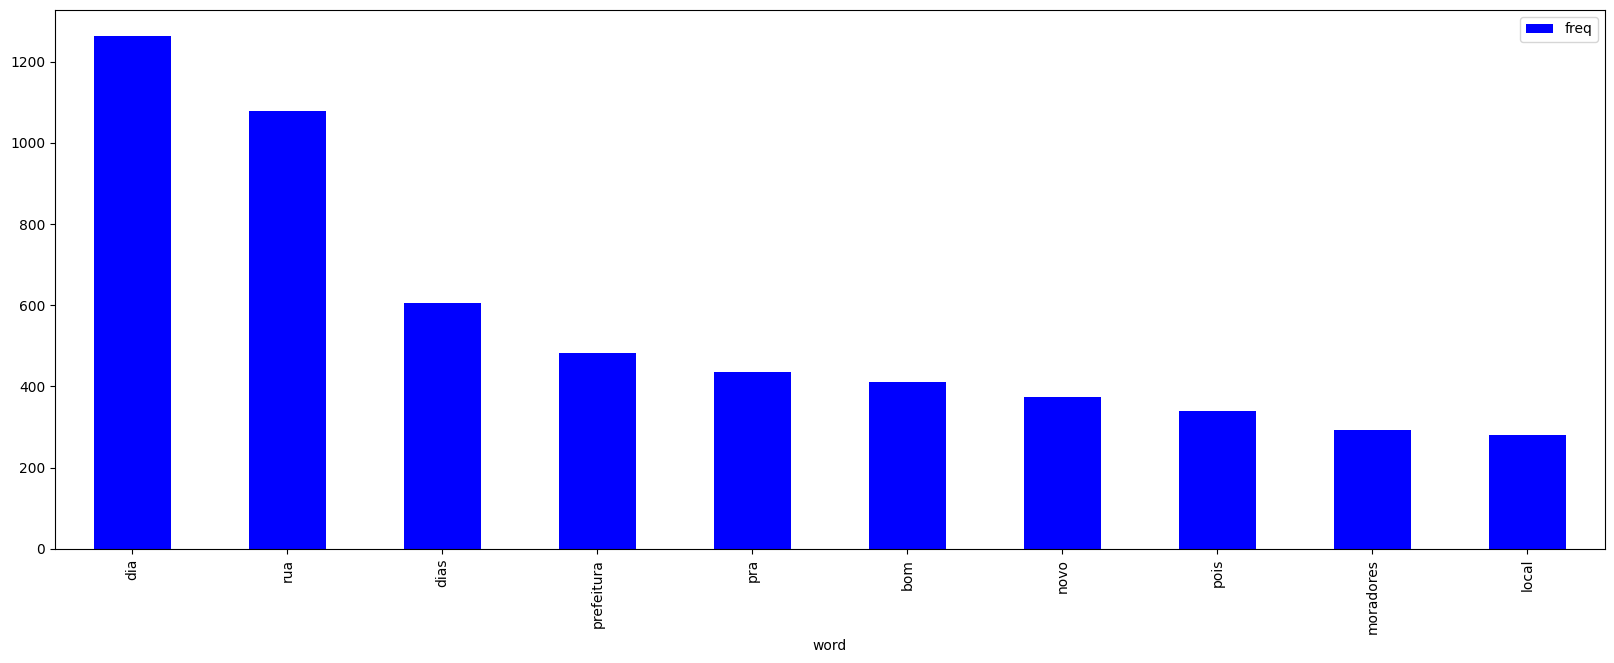

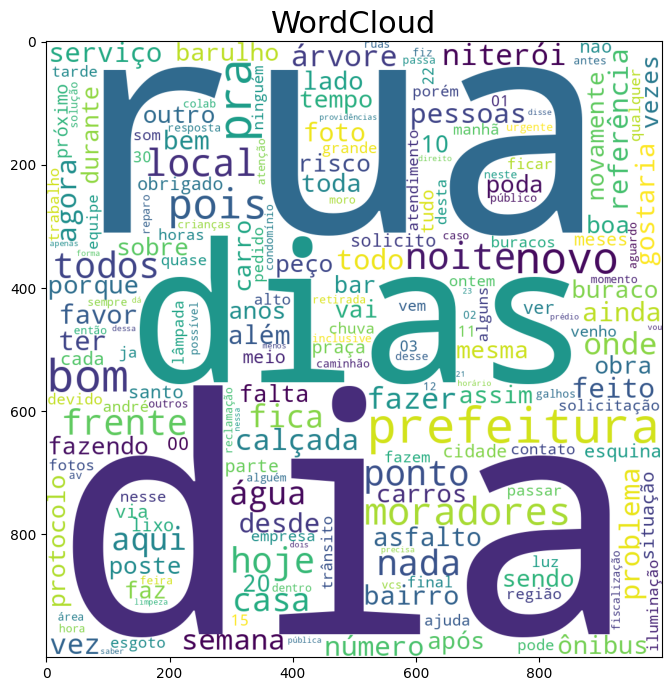

In [20]:
# Visualizar a distribuição de palavras nos melhores scores
visualizarDistribuicaoPalavras(best_scores['description'], 10)

# Aggregate user's score

In [21]:
# Group by 'colab_user_id' and aggregate
agg_data = dataset.groupby('colab_user_id').agg(
    number_of_posts=pd.NamedAgg(column='normalized_score', aggfunc='size'),
    average_score=pd.NamedAgg(column='normalized_score', aggfunc='mean')
).reset_index()

agg_data

,colab_user_id,number_of_posts,average_score
0,2,19,-0.427821
1,86,49,-0.404134
2,2654,3,-0.259053
3,5148,1,0.000000
4,5384,7,-0.324012
...,...,...,...
24967,976155,1,-0.875000
24968,976450,1,0.101865
24969,977062,1,0.111192
24970,977537,1,-0.896196


In [22]:
sorted_agg_data = agg_data.sort_values(by='average_score', ascending=False)
sorted_agg_data

,colab_user_id,number_of_posts,average_score
12091,328388,2,0.787358
5854,223122,1,0.481451
1841,135483,1,0.448808
14063,346750,1,0.442280
22289,691724,1,0.437617
...,...,...,...
22752,702824,1,-0.899728
16112,383696,1,-0.899728
16125,384284,1,-0.899728
1520,126152,1,-0.899728


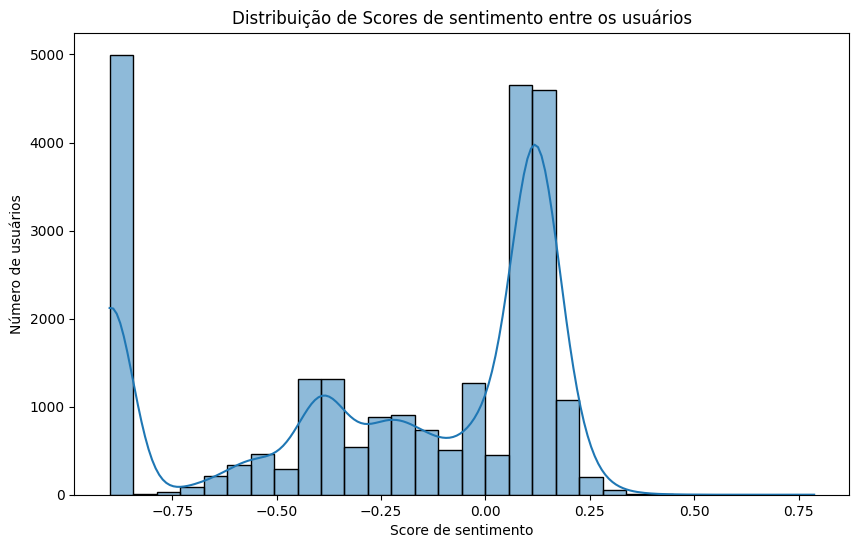

In [24]:
# Distribution plot (histogram) of aggregate scores
plt.figure(figsize=(10, 6))
sns.histplot(agg_data['average_score'], bins=30, kde=True)
plt.title('Distribuição de Scores de sentimento entre os usuários')
plt.xlabel('Score de sentimento')
plt.ylabel('Número de usuários')
plt.show()

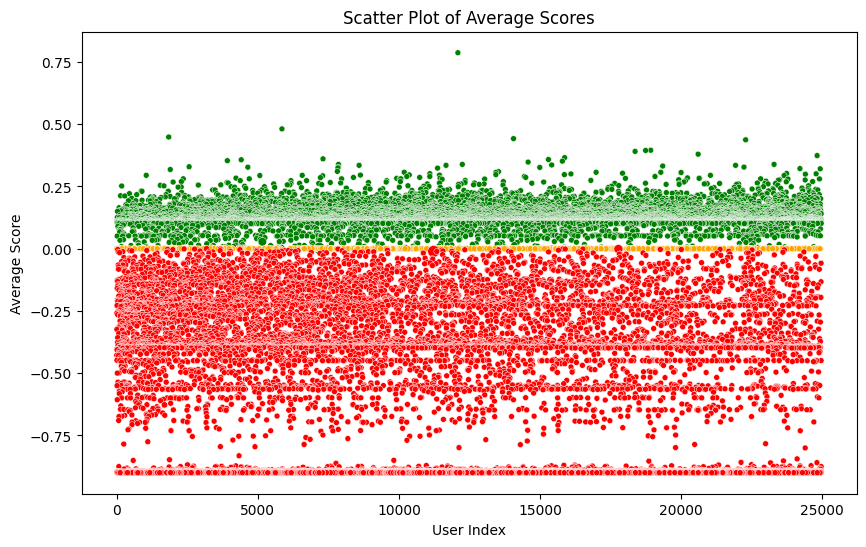

In [25]:
# Define a function to map scores to colors
def score_to_color(score):
    if score > 0:
        return "green"
    elif score < 0:
        return "red"
    else:
        return "orange"

# Apply the function to create a new 'color' column
sorted_agg_data['color'] = sorted_agg_data['average_score'].apply(score_to_color)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sorted_agg_data,
    x=sorted_agg_data.index,
    y='average_score',
    hue='color',
    size='number_of_posts',  # Use number_of_posts for marker size
    palette={"red": "red", "orange": "orange", "green": "green"},
    legend=False
)
plt.title('Scatter Plot of Average Scores')
plt.xlabel('User Index')
plt.ylabel('Average Score')
plt.show()


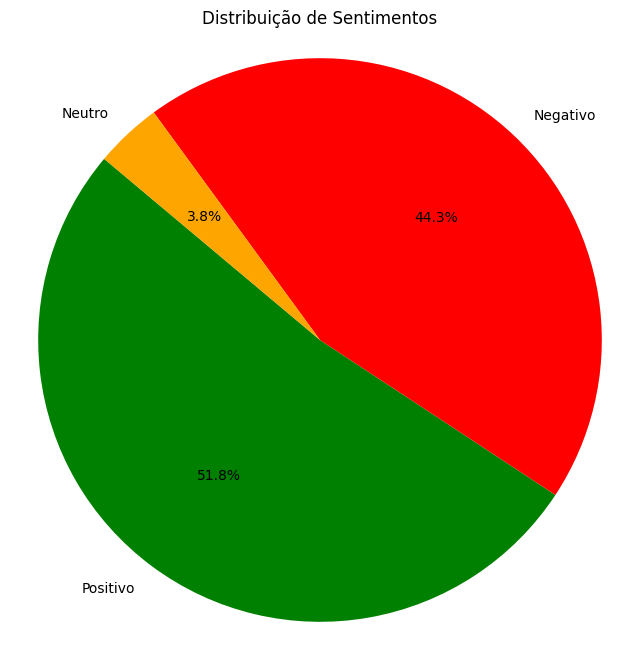

In [26]:
# Calculate the count of each sentiment category
sentiment_counts = sorted_agg_data['color'].value_counts()

# Create a pie chart with custom labels
labels = ['Positivo', 'Negativo', 'Neutro']
colors = ['green', 'red', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Sentimentos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
# Calculate the average score for each event type
event_type_avg_scores = dataset.groupby('event_type_id')['score'].mean()

# Find the event type with the highest positive average score
most_positive_event_type_id = event_type_avg_scores.idxmax()
most_positive_avg_score = event_type_avg_scores.max()

# Find the event type with the lowest (most negative) average score
most_negative_event_type_id = event_type_avg_scores.idxmin()
most_negative_avg_score = event_type_avg_scores.min()

# Print the results
print(f"Most Positive Event Type ID: {most_positive_event_type_id}, Average Score: {most_positive_avg_score}")
print(f"Most Negative Event Type ID: {most_negative_event_type_id}, Average Score: {most_negative_avg_score}")

Most Positive Event Type ID: 393, Average Score: 196.0
Most Negative Event Type ID: 483, Average Score: -60.5


Number of Posts by Gender and Sentiment:
sentiment     Negative  Neutral  Positive
gender                                   
female           12403     3213     21490
male             36617    36311     73217
non_binary          38       13        31
not_informed       164       37       215
others            1681      532      1747


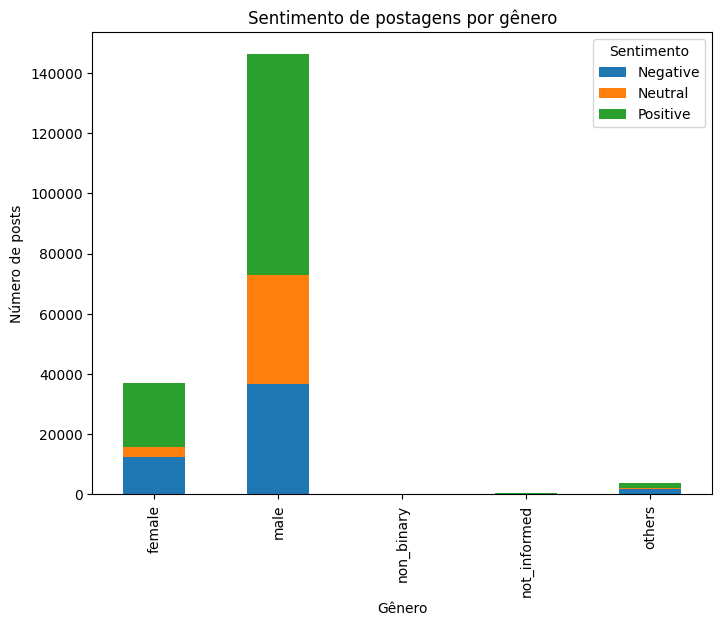

In [28]:
# Merge the 'dataset' and 'nodes' DataFrames on 'colab_user_id'
merged_data = dataset.merge(nodes, on='colab_user_id', how='inner')
# Define a function to classify scores into positive, negative, or neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification to 'normalized_score' and create a 'sentiment' column
merged_data['sentiment'] = merged_data['normalized_score'].apply(classify_sentiment)
# Calculate the number of posts by gender and sentiment
gender_sentiment_counts = merged_data.groupby(['gender', 'sentiment']).size().unstack(fill_value=0)
# Print the counts
print("Number of Posts by Gender and Sentiment:")
print(gender_sentiment_counts)

# Reset the index to move 'gender' to columns
gender_sentiment_counts.reset_index(inplace=True)

# Create a stacked bar chart
gender_sentiment_counts.set_index('gender').plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Sentimento de postagens por gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de posts')
plt.legend(title='Sentimento', loc='upper right')
plt.show()

In [ ]:
agg_data.to_csv('colab_sentiment_aggregate_3_cidades.csv', encoding='utf-8-sig', index=False)

In [29]:
# Group by 'event_type_id' and 'event_type_name' to get unique combinations
unique_event_types = merged_events.groupby(['event_type_id', 'event_type_name']).size().reset_index()

# Rename the columns for clarity
unique_event_types.columns = ['event_type_id', 'event_type_name', 'count']

# Print the result
print(unique_event_types)

     event_type_id                      event_type_name  count
0                1                    Semáforo quebrado      4
1                2         Iluminação pública irregular     13
2                3                      Buraco nas vias    305
3                4      Foco de mosquito da dengue/zika     20
4                5                       Poda de árvore    105
..             ...                                  ...    ...
564          12419             Limpeza de rios e canais      3
565          12420              Rede de Saúde Municipal     11
566          12421                  Pavimentação de via      7
567          12549  Sarjeta- Reconstrução/renivelamento      6
568          12551                  Vielas / Escadarias      1

[569 rows x 3 columns]


In [30]:
# Define a function to classify scores into positive, negative, or neutral
def classify_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Choose an event type ID for analysis
chosen_event_type_id = 9908

# Filter the DataFrame for the chosen event type ID
event_type_data = dataset[dataset['event_type_id'] == chosen_event_type_id]

# Classify the scores into positive, negative, or neutral
event_type_data['sentiment'] = event_type_data['score'].apply(classify_sentiment)

# Count the number of positive, negative, and neutral posts
sentiment_counts = event_type_data['sentiment'].value_counts()

# Print the counts
print(f"Event Type ID {chosen_event_type_id}:")
print(f"Positive Posts: {sentiment_counts['positive']}")
print(f"Negative Posts: {sentiment_counts['negative']}")
print(f"Neutral Posts: {sentiment_counts['neutral']}")

Event Type ID 9908:
Positive Posts: 20310
Negative Posts: 2801
Neutral Posts: 23601


<ipython-input-30-2a40ed7eed59>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_type_data['sentiment'] = event_type_data['score'].apply(classify_sentiment)


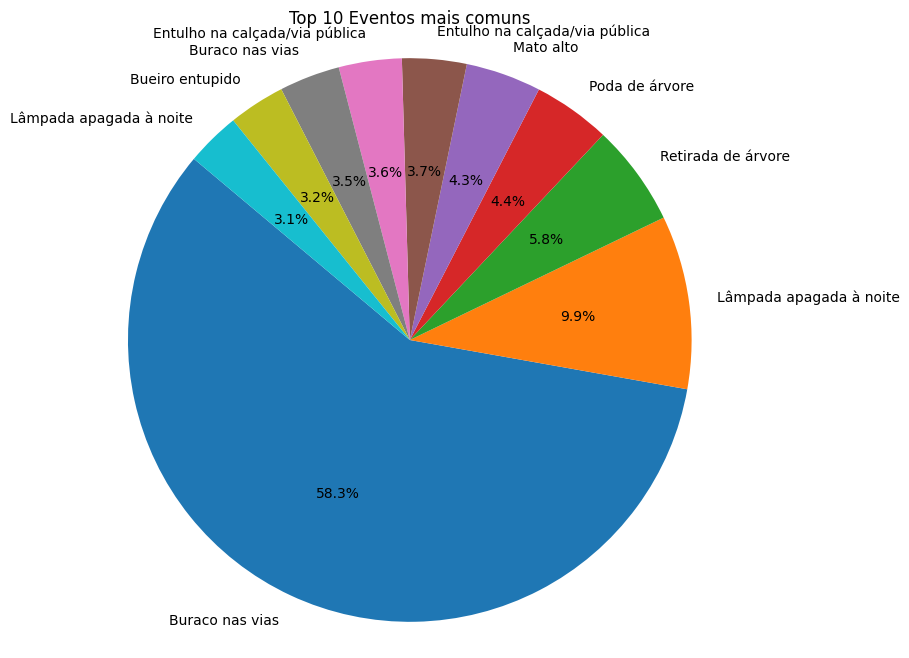

In [149]:
# Count the occurrences of each event type ID and sort them in descending order
event_type_counts = dataset['event_type_id'].value_counts().sort_values(ascending=False)

# Select the top 10 most common event type IDs
top_10_event_types = event_type_counts.head(10)

# Get the event type names from unique_event_types
event_type_names = unique_event_types[unique_event_types['event_type_id'].isin(top_10_event_types.index)]['event_type_name']

# Create a pie chart with event type names as labels
plt.figure(figsize=(8, 8))
plt.pie(top_10_event_types, labels=event_type_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Eventos mais comuns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [212]:
# Count the occurrences of each event type ID and sort them in descending order
event_type_counts = dataset['event_type_id'].value_counts().sort_values(ascending=False)

# Select the top 10 most common event type IDs
top_10_event_types = event_type_counts.head(100)

# Get the event type names from unique_event_types
event_type_names = unique_event_types[unique_event_types['event_type_id'].isin(top_10_event_types.index)]['event_type_name']

# Calculate the percentages
percentages = (top_10_event_types / top_10_event_types.sum()) * 100

# Print the event labels and their percentages
for event_name, percentage in zip(event_type_names, percentages):
    print(f"Event Name: {event_name}, Percentage: {percentage:.1f}%")


Event Name: Buraco nas vias, Percentage: 39.7%
Event Name: Poda de árvore, Percentage: 6.8%
Event Name: Bueiro entupido, Percentage: 4.0%
Event Name: Entulho na calçada/via pública, Percentage: 3.0%
Event Name: Bueiro sem tampa, Percentage: 2.9%
Event Name: Lâmpada apagada à noite, Percentage: 2.5%
Event Name: Mato alto, Percentage: 2.5%
Event Name: Retirada de árvore, Percentage: 2.4%
Event Name: Aglomeração de pessoas, Percentage: 2.2%
Event Name: Ponto de ônibus danificado, Percentage: 2.1%
Event Name: Ônibus/trem/metrô danificado, Percentage: 1.8%
Event Name: Via de terra com desnível, Percentage: 1.8%
Event Name: Placa de sinalização quebrada/inexistente, Percentage: 1.4%
Event Name: Ponto de infração de trânsito recorrente, Percentage: 1.3%
Event Name: Veículo abandonado, Percentage: 1.3%
Event Name: Buraco nas vias, Percentage: 1.2%
Event Name: Semáforo quebrado, Percentage: 1.2%
Event Name: Bloqueio na via, Percentage: 1.2%
Event Name: Vazamento de água, Percentage: 1.1%
Event 

In [229]:
# Criar um grafo direcionado a partir do DataFrame de arestas
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Calcular a centralidade de eigenvector para cada nó
eigenvector_centralities = nx.eigenvector_centrality(G)

# Adicionar as centralidades de eigenvector ao DataFrame 'dataset'
dataset['eigenvector_centrality'] = dataset['colab_user_id'].map(eigenvector_centralities)

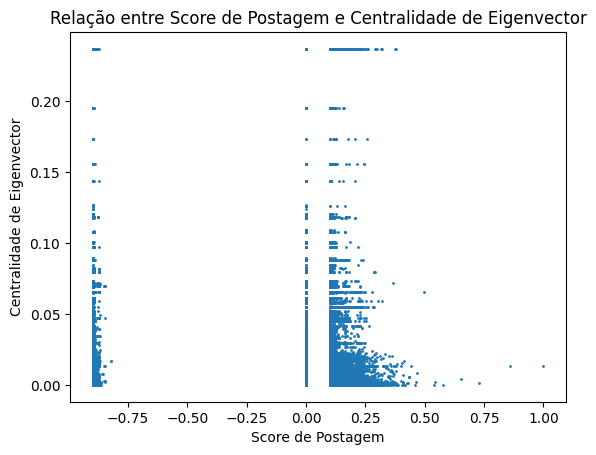

In [216]:
# 1) Relação entre score de postagem e centralidade de eigenvector
plt.scatter(dataset['normalized_score'], dataset['eigenvector_centrality'], s=1)
plt.xlabel('Score de Postagem')
plt.ylabel('Centralidade de Eigenvector')
plt.title('Relação entre Score de Postagem e Centralidade de Eigenvector')
plt.show()

In [233]:
# Calculate the count of posts for each user and event type
user_event_counts = dataset.groupby(['colab_user_id', 'event_type_id']).size().reset_index(name='count')
# Find the event type for which each user has the maximum count of posts
user_most_frequent_event = user_event_counts.groupby('colab_user_id')['event_type_id'].idxmax()

# Create a mapping between users and their most frequent event type
user_event_mapping = user_event_counts.loc[user_most_frequent_event]

# Create a dictionary to map users to their most frequent event type
user_to_event_type_mapping = dict(zip(user_event_mapping['colab_user_id'], user_event_mapping['event_type_id']))
nodes['event_type_id'] = nodes['colab_user_id'].map(user_to_event_type_mapping)

In [236]:
# Create a mapping between 'colab_user_id' and 'number_of_posts' and 'average_score'
user_to_posts_mapping = dict(zip(agg_data['colab_user_id'], agg_data['number_of_posts']))
user_to_average_score_mapping = dict(zip(agg_data['colab_user_id'], agg_data['average_score']))

# Add the 'number_of_posts' and 'average_score' columns to the 'nodes' DataFrame
nodes['number_of_posts'] = nodes['colab_user_id'].map(user_to_posts_mapping)
nodes['average_score'] = nodes['colab_user_id'].map(user_to_average_score_mapping)

In [237]:
nodes

,colab_user_id,birth_date,city,education,gender,idade,race,event_type_id,number_of_posts,average_score
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white,3380.0,20.0,-0.403668
1,222051,1961-02-12,Santo André,primary,male,62.0,NaN,3374.0,94.0,-0.133937
2,440321,1995-12-16,Niterói,secondary,female,28.0,brown,NaN,NaN,NaN
3,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white,NaN,NaN,NaN
4,427856,1960-05-04,Niterói,bachelor,male,63.0,white,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
57796,702775,1980-07-16,São Gonçalo,NaN,male,43.0,NaN,NaN,NaN,NaN
57797,362855,1983-01-07,Santo André,NaN,male,40.0,NaN,3358.0,1.0,0.174250
57798,947835,NaN,Serra,NaN,male,NaN,NaN,NaN,NaN,NaN
57799,694585,1974-10-20,São Gonçalo,secondary,male,49.0,brown,NaN,NaN,NaN


In [249]:
dataset

,event_id,colab_user_id,description,event_type_id,lat,lng,lon,score,normalized_score,sentiment,eigenvector_centrality
0,1195,6734,Existe um terreno baldio na Avenida Dom Pedro ...,3369,-23.631221,-46.546693,NaN,-5.5,-0.897011,Negative,2.062927e-57
1,1495,8291,Vamos colaborar,7,-23.668849,-46.473615,NaN,-6.0,-0.896739,Negative,2.384688e-03
2,2059,8631,"É ridículo e constrangedor para nós, Chegar o...",3370,-23.641205,-46.508335,NaN,6.0,0.113500,Positive,NaN
3,2395,10454,Todo final de semana acaba a água. No dia do ...,3370,-23.679570,-46.554197,NaN,14.0,0.131500,Positive,NaN
4,3054,18691,Vários buracos pequenos e grandes no viaduto C...,3,-23.639546,-46.537699,NaN,12.0,0.127000,Positive,9.706951e-03
...,...,...,...,...,...,...,...,...,...,...,...
119759,328273,495374,o veículo já está a mais de 4 dias no mesmo lo...,26,-23.623321,NaN,-46.541211,25.0,0.156250,Positive,NaN
119760,336703,654757,"Após início das obras do Edifício Patriani, me...",15,-23.671674,NaN,-46.526472,9.0,0.120250,Positive,NaN
119761,336177,654278,Bar com som alto sempre depois das 22 hs. Abr...,12,-23.636272,NaN,-46.517035,-10.0,-0.894565,Negative,NaN
119762,334387,638285,"Pessoal, não existe categoria específica pro m...",16,-23.671686,NaN,-46.534819,14.5,0.132625,Positive,NaN


In [292]:
# Get the unique user IDs from the nodes DataFrame
unique_user_ids_nodes = set(nodes['colab_user_id'])

# Get the unique user IDs from the edges DataFrame (both source and target)
unique_user_ids_edges = set(edges['source']).union(set(edges['target']))

# Find the user IDs that are in the edges but not in the nodes DataFrame
missing_user_ids = unique_user_ids_edges - unique_user_ids_nodes

# Check if there are any missing user IDs
if len(missing_user_ids) > 0:
    print(f"Missing user IDs: {missing_user_ids}")
else:
    print("No missing user IDs found.")

No missing user IDs found.


In [334]:
nodes.fillna("", inplace=True)
nodes

,colab_user_id,birth_date,city,education,gender,idade,race,event_type_id,number_of_posts,average_score
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white,3380.0,20.0,-0.403668
1,222051,1961-02-12,Santo André,primary,male,62.0,,3374.0,94.0,-0.133937
2,440321,1995-12-16,Niterói,secondary,female,28.0,brown,,,
3,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white,,,
4,427856,1960-05-04,Niterói,bachelor,male,63.0,white,,,
...,...,...,...,...,...,...,...,...,...,...
57796,702775,1980-07-16,São Gonçalo,,male,43.0,,,,
57797,362855,1983-01-07,Santo André,,male,40.0,,3358.0,1.0,0.17425
57798,947835,,Serra,,male,,,,,
57799,694585,1974-10-20,São Gonçalo,secondary,male,49.0,brown,,,


In [335]:
# Lista de IDs de usuário únicos
unique_user_ids = dataset['colab_user_id'].tolist()
filtered_nodes = nodes
# Filtrar as arestas com base nos IDs de usuário únicos
filtered_edges = edges
G = nx.from_pandas_edgelist(filtered_edges, source='source', target='target', create_using=nx.DiGraph())
print(G)

DiGraph with 18891 nodes and 40131 edges


In [336]:
# Iterate through the nodes of the graph 'G' and update node information
for colab_user_id in G.nodes():
    # Check if the 'colab_user_id' exists in the 'nodes_filtered' DataFrame
    if colab_user_id in filtered_nodes.index:
        # Get the node data from 'nodes_filtered'
        node_data = filtered_nodes.loc[colab_user_id]
        # Update the node attributes in 'G' with the data from 'nodes_filtered'
        G.nodes[colab_user_id].update(node_data.to_dict())

In [338]:
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
event_type_assortativity = nx.attribute_assortativity_coefficient(G, 'event_type_id')
print(f"Assortativity with respect to 'event_type_id': {event_type_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
idade_assortativity = nx.attribute_assortativity_coefficient(G, 'idade')
print(f"Assortativity with respect to 'idade': {idade_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
gender_assortativity = nx.attribute_assortativity_coefficient(G, 'gender')
print(f"Assortativity with respect to 'gender': {gender_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
education_assortativity = nx.attribute_assortativity_coefficient(G, 'education')
print(f"Assortativity with respect to 'education': {education_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
race_assortativity = nx.attribute_assortativity_coefficient(G, 'race')
print(f"Assortativity with respect to 'race': {race_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'event_type_id' attribute
average_score_assortativity = nx.attribute_assortativity_coefficient(G, 'average_score')
print(f"Assortativity with respect to 'average_score': {average_score_assortativity}")
##
# Calculate the assortativity of 'G' with respect to the 'city' attribute
city_assortativity = nx.attribute_assortativity_coefficient(G, 'city')
print(f"Assortativity with respect to 'city': {city_assortativity}")

Assortativity with respect to 'event_type_id': 0.21208815800071193
Assortativity with respect to 'idade': 0.1348941881469134
Assortativity with respect to 'gender': 0.19253859523589797
Assortativity with respect to 'education': 0.17354498121378664
Assortativity with respect to 'race': 0.2084882677178371
Assortativity with respect to 'average_score': 0.21198600524217426
Assortativity with respect to 'city': 0.16765474355706753


In [341]:
# Calculate eigenvector centrality for each node in 'G'
eigenvector_centralities = nx.eigenvector_centrality(G)

# Add the calculated centrality values to your nodes DataFrame
nodes['eigenvector_centrality'] = nodes['colab_user_id'].map(eigenvector_centralities)

nodes

,colab_user_id,birth_date,city,education,gender,idade,race,event_type_id,number_of_posts,average_score,eigenvector_centrality
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white,3380.0,20.0,-0.403668,5.435882e-03
1,222051,1961-02-12,Santo André,primary,male,62.0,,3374.0,94.0,-0.133937,6.078776e-03
2,440321,1995-12-16,Niterói,secondary,female,28.0,brown,,,,NaN
3,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white,,,,4.484625e-59
4,427856,1960-05-04,Niterói,bachelor,male,63.0,white,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57796,702775,1980-07-16,São Gonçalo,,male,43.0,,,,,NaN
57797,362855,1983-01-07,Santo André,,male,40.0,,3358.0,1.0,0.17425,NaN
57798,947835,,Serra,,male,,,,,,NaN
57799,694585,1974-10-20,São Gonçalo,secondary,male,49.0,brown,,,,NaN


In [345]:
# Get the top 10 nodes with the largest number of posts
top_10_nodes = nodes.nlargest(10, 'number_of_posts')

# Print the top 10 nodes
print("Top 10 Nodes with the Largest Number of Posts:")
print(top_10_nodes[['colab_user_id', 'number_of_posts']])

Top 10 Nodes with the Largest Number of Posts:
       colab_user_id  number_of_posts
8017          318649          12287.0
16954         240336          11609.0
7834          425243           5310.0
4246          216238           4490.0
57            186310           4185.0
5497          253059           1698.0
3930          200628           1550.0
7831          264351           1450.0
4208          226175           1429.0
262           347006           1367.0


In [355]:
eigenvector_centralities = nx.eigenvector_centrality(G)

def print_top_users_info(G, nodes, num_top_users=10):
    # Get the top nodes with the largest number of posts
    top_nodes = nodes.nlargest(num_top_users, 'number_of_posts')

    for _, node_data in top_nodes.iterrows():
        node_id = node_data['colab_user_id']

        # Get the Eigenvector centrality for the node

        eigenvector_centrality = eigenvector_centralities.get(node_id, "Node not found")

        # Get the number of followers and following for the node
        in_degree = G.in_degree(node_id)
        out_degree = G.out_degree(node_id)

        # Get the number of posts and average score from nodes DataFrame
        number_of_posts = node_data['number_of_posts']
        average_score = node_data['average_score']
        event_type_id = node_data['event_type_id']
        gender = node_data['gender']
        age = node_data['idade']
        race = node_data['race']

        # Print node information
        print(f"Node ID: {node_id}")
        print(f"Eigenvector Centrality: {eigenvector_centrality}")
        print(f"Number of Followers: {in_degree}")
        print(f"Number of Following: {out_degree}")
        print(f"Number of Posts: {number_of_posts}")
        print(f"Average Score: {average_score}")
        print(f"Gender: {gender}")
        print(f"Age: {age}")
        print(f"Race: {race}")
        print("\n")

# Example usage:
# Replace G and nodes with your graph and nodes DataFrame
print_top_users_info(G, nodes)


Node ID: 318649
Eigenvector Centrality: 0.05176260507961647
Number of Followers: 26
Number of Following: 5
Number of Posts: 12287.0
Average Score: -0.010798138541618749
Gender: male
Age: 38.0
Race: 


Node ID: 240336
Eigenvector Centrality: 0.0472143780384065
Number of Followers: 13
Number of Following: 5
Number of Posts: 11609.0
Average Score: 0.0029470912747605925
Gender: male
Age: 49.0
Race: brown


Node ID: 425243
Eigenvector Centrality: 0.037787680108453875
Number of Followers: 16
Number of Following: 15
Number of Posts: 5310.0
Average Score: -0.00108849381806272
Gender: male
Age: 48.0
Race: brown


Node ID: 216238
Eigenvector Centrality: 0.11863699219488467
Number of Followers: 78
Number of Following: 18
Number of Posts: 4490.0
Average Score: 0.02852388762467319
Gender: male
Age: 59.0
Race: brown


Node ID: 186310
Eigenvector Centrality: 0.23695412042222658
Number of Followers: 135
Number of Following: 1269
Number of Posts: 4185.0
Average Score: -0.0810841073191003
Gender: male
A

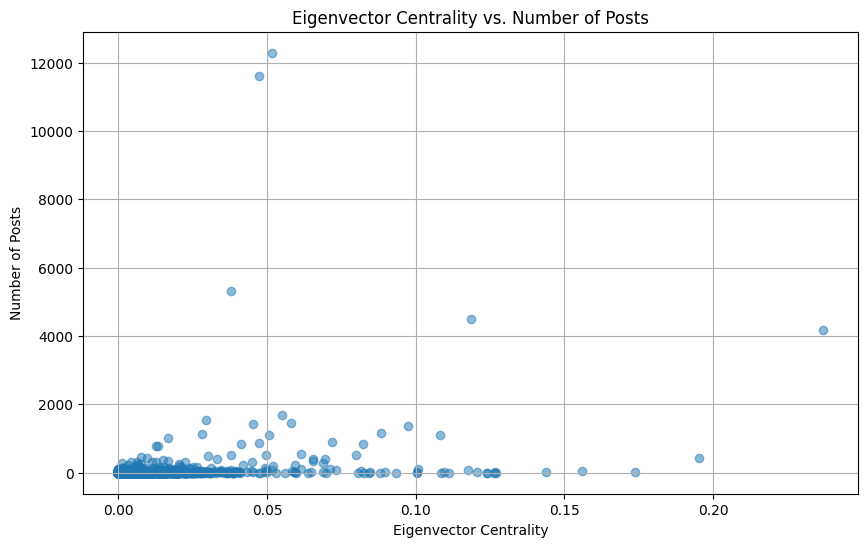

In [356]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a graph 'G' from your edges DataFrame
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Calculate eigenvector centrality for each node in 'G'
eigenvector_centralities = nx.eigenvector_centrality(G)

# Convert non-numeric values to NaN in the 'eigenvector_centrality' column
nodes['eigenvector_centrality'] = pd.to_numeric(nodes['eigenvector_centrality'], errors='coerce')

# Convert non-numeric values to NaN in the 'number_of_posts' column
nodes['number_of_posts'] = pd.to_numeric(nodes['number_of_posts'], errors='coerce')

# Replace NaN values with 0 in both columns
nodes['eigenvector_centrality'].fillna(0, inplace=True)
nodes['number_of_posts'].fillna(0, inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(nodes['eigenvector_centrality'], nodes['number_of_posts'], alpha=0.5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Posts')
plt.title('Eigenvector Centrality vs. Number of Posts')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
def jaccard_similarity(u, v):
    intersection = len(set(dataset.loc[dataset['colab_user_id'] == u, 'event_type_id']).intersection(set(dataset.loc[dataset['colab_user_id'] == v, 'event_type_id'])))
    union = len(set(dataset.loc[dataset['colab_user_id'] == u, 'event_type_id']).union(set(dataset.loc[dataset['colab_user_id'] == v, 'event_type_id'])))
    return intersection / union

# Calcular a matriz de similaridade de Jaccard entre todos os pares de usuários
user_ids = dataset['colab_user_id'].unique()
jaccard_matrix = pd.DataFrame(index=user_ids, columns=user_ids)
for u in user_ids:
    for v in user_ids:
        if u != v:
            similarity = jaccard_similarity(u, v)
            jaccard_matrix.loc[u, v] = similarity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de ter calculado a matriz de similaridade de Jaccard (jaccard_matrix) conforme mencionado no código anterior

# Defina o estilo do mapa de calor
sns.set(style="whitegrid")

# Crie uma figura matplotlib
plt.figure(figsize=(10, 8))

# Crie um mapa de calor (heatmap) da matriz de similaridade de Jaccard
sns.heatmap(jaccard_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Adicione rótulos aos eixos
plt.xlabel('Usuário ID')
plt.ylabel('Usuário ID')

# Defina o título do gráfico
plt.title('Matriz de Similaridade de Jaccard entre Usuários')

# Exiba o gráfico
plt.show()